${\bf Exercice 1}$




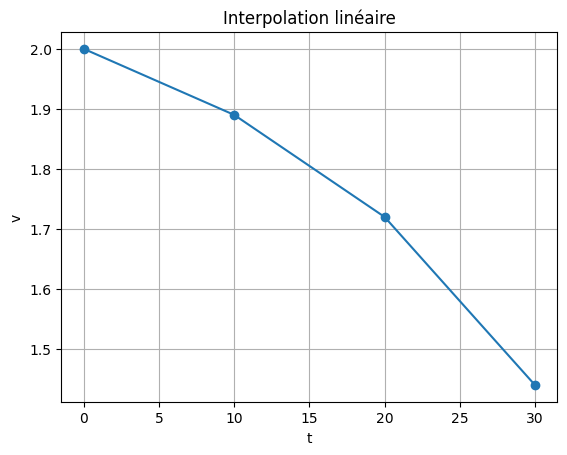

Valeur interpolée pour t=15 : 1.805


In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([0, 10, 20, 30])
v = np.array([2, 1.89, 1.72, 1.44])

plt.plot(t, v, '-o')  # Trace les points (t,v) avec des marqueurs "o"
plt.xlabel('t')
plt.ylabel('v')
plt.title('Interpolation linéaire')
plt.grid(True)
plt.show()

# Valeur interpolée pour t=15
v_interp = np.interp(15, t, v)
print("Valeur interpolée pour t=15 :", v_interp)

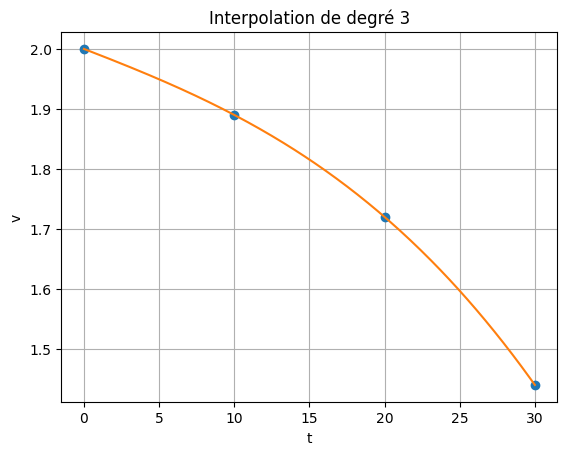

Valeur interpolée pour t=15 : 1.8156249999999998


In [4]:
p = np.polyfit(t, v, 3)

# Évaluation du polynôme sur un vecteur détaillé
t_det = np.arange(0, 30.1, 0.1)  # Crée des valeurs de 0 à 30 avec un pas de 0.1
v_det = np.polyval(p, t_det)

plt.plot(t, v, 'o')
plt.plot(t_det, v_det)
plt.xlabel('t')
plt.ylabel('v')
plt.grid(True)
plt.title('Interpolation de degré 3')
plt.show()

# Valeur interpolée pour t=15
v_interp = np.polyval(p, 15)
print("Valeur interpolée pour t=15 :", v_interp)


${\bf Exercice 2}$




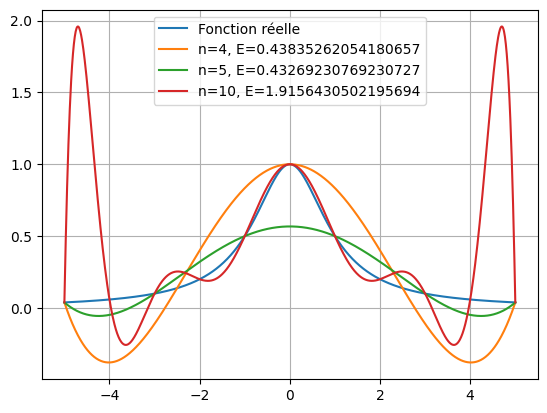

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n = [4, 5, 10]
Y = np.arange(-5, 5.01, 1/100)
F = 1 / (1 + Y**2)

plt.plot(Y, F, label='Fonction réelle')

for i in range(len(n)):
    X = np.arange(-5, 5.01, 10/n[i])
    F = 1 / (1 + X**2)
    Fi = np.polyfit(X, F, n[i])
    P = np.polyval(Fi, Y)
    E = np.max(np.abs(P - 1 / (1 + Y**2)))
    
    plt.plot(Y, P, label=f'n={n[i]}, E={E}')

plt.legend()
plt.grid(True)
plt.show()



On peut observer le phénomène de non convergence: l’erreur augmente.

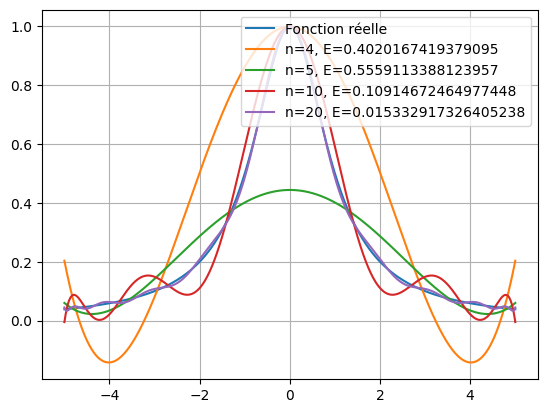

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = [4, 5, 10, 20]
Y = np.arange(-5, 5.01, 1/100)
F = 1 / (1 + Y**2)

plt.plot(Y, F, label='Fonction réelle')

for i in range(len(n)):
    X = np.zeros(n[i] + 1)
    for j in range(n[i] + 1):
        X[j] = 5 * np.cos(((2*j + 1) * np.pi) / (2 * (n[i] + 1)))

    F = 1 / (1 + X**2)
    Fi = np.polyfit(X, F, n[i])
    P = np.polyval(Fi, Y)
    E = np.max(np.abs(P - 1 / (1 + Y**2)))
    
    plt.plot(Y, P, label=f'n={n[i]}, E={E}')

plt.legend()
plt.grid(True)
plt.show()

Avec les nœuds de Tchebychev, le phénomène de Runge disparait, l’erreur diminue et la fonction est approximée correctement lorsque n augmente.


${\bf Exercice 3}$



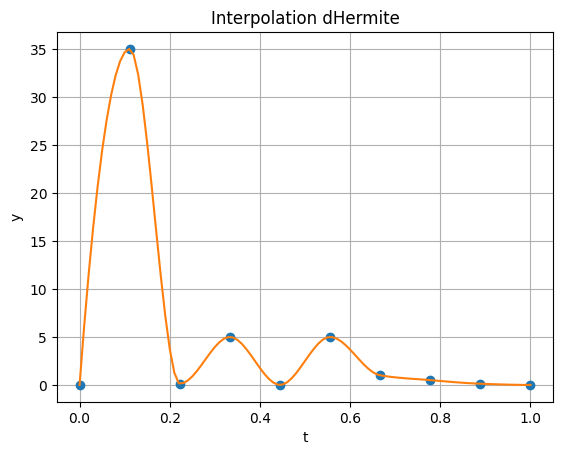

In [6]:
import numpy as np
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt

y = np.array([0, 35, 0.125, 5, 0, 5, 1, 0.5, 0.125, 0])
t = np.linspace(0, 1, 10)
t_det = np.arange(0, 1.01, 0.01)

interpolator = pchip_interpolate(t, y, t_det)


plt.plot(t, y, 'o')
plt.plot(t_det, interpolator)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Interpolation d''Hermite')
plt.grid(True)
plt.show()

${\bf Exercice 4}$




Au préalable il nous faut calculer la dérivée g de la fonction f

In [11]:
import sympy as sp

# Définition de la variable symbolique x
x = sp.Symbol('x')

# Définition de la fonction f(x)
f = 1/2 * (x * sp.sqrt(1 - x**2) + sp.asin(x))

# Calcul de la dérivée de f(x) par rapport à x
df = sp.diff(f, x)

print("La dérivée de f(x) est :", df)

La dérivée de f(x) est : -0.5*x**2/sqrt(1 - x**2) + 0.5*sqrt(1 - x**2) + 0.5/sqrt(1 - x**2)


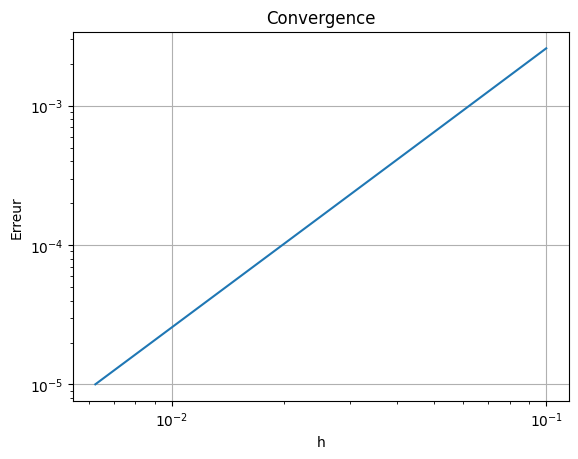

Pente : 2.0017319749803573


In [8]:
import numpy as np
import matplotlib.pyplot as plt

h = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625])

# Définition des fonctions f(x) et g(x)
f = lambda x: 1/2 * (x * np.sqrt(1 - x**2) + np.arcsin(x))
g = lambda x: 1 / (2 * (1 - x**2)**(1/2)) - x**2 / (2 * (1 - x**2)**(1/2)) + (1 - x**2)**(1/2) / 2

df = np.zeros(len(h))
E = np.zeros(len(h))

for i in range(len(h)):
    df[i] = (f(0.5 + h[i]) - f(0.5 - h[i])) / (2 * h[i])
    E[i] = np.abs(df[i] - g(0.5))

plt.loglog(h, E)
plt.xlabel('h')
plt.ylabel('Erreur')
plt.title('Convergence')
plt.grid(True)
plt.show()

# Calcul de la pente
p = np.polyfit(np.log(h), np.log(E), 1)

print("Pente :", p[0])




On obtient la pente suivante qui est bien proche de 2 (ordre de convergence vu en cours)